In [1]:
# this is just to know how much time will it take to run this entire ipython notebook 
from datetime import datetime

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib
matplotlib.use('nbagg')

import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})

import seaborn as sns
sns.set_style('whitegrid')

## reading data from the csv file

In [4]:
df = pd.read_csv('data.csv', sep=',', 
                       names=['movie', 'user','rating','date'])
df.date = pd.to_datetime(df.date)

# we are arranging the ratings according to time.
df.sort_values(by='date', inplace=True)
df.head()

,movie,user,rating,date
58698779,10774,510180,3.0,1999-11-11
96212476,17064,510180,2.0,1999-11-11
6901473,1367,510180,5.0,1999-11-11
49973109,9003,510180,3.0,1999-11-11
20393918,3870,510180,2.0,1999-11-11


In [5]:
df = pd.read_csv('data.csv', sep=',', 
                       names=['movie', 'user','rating','date'])
df.date = pd.to_datetime(df.date)

# we are arranging the ratings according to time.
df.sort_values(by='date', inplace=True)
df.head()

,movie,user,rating,date
58698779,10774,510180,3.0,1999-11-11
96212476,17064,510180,2.0,1999-11-11
6901473,1367,510180,5.0,1999-11-11
49973109,9003,510180,3.0,1999-11-11
20393918,3870,510180,2.0,1999-11-11


### Is there any entry that has Nan values...??

In [6]:
# it returns True for a row that has atleast one Nan value.
null_bool = df.isnull().any(axis = 1)
df[null_bool]

,movie,user,rating,date
95880696,16992,962,NaN,NaT
95963294,17002,51082,NaN,NaT


In [7]:
df.drop(df[null_bool].index, inplace=True)

In [8]:
print("No of Nan values in our dataframe : ", sum(df.isnull().any()))

No of Nan values in our dataframe :  0


### Let's try to find the duplicates if any...

In [9]:
dup_bool = df.duplicated(['movie','user','rating'])
dups = sum(dup_bool) # by considering all columns..( including timestamp )
print("There are {} duplicate rating entries in the data..".format(dups))

There are 1211 duplicate rating entries in the data..


In [10]:
# let's find what are the movies that has duplicate entries of user ratings....
df[dup_bool].movie.value_counts()

16969    762
16968    449
Name: movie, dtype: int64

__Removing those duplicate entries__  (inplace)

In [11]:
df.drop(df[dup_bool].index, inplace=True)

In [12]:
print("No of duplicate rows (movie, user, rating) entries :", sum(df.duplicated()))

No of duplicate rows (movie, user, rating) entries : 0


In [13]:
print("\nNo of ratings that we have, after removing nan rows and duplicates are :", df.shape[0])


No of ratings that we have, after removing nan rows and duplicates are : 100479045


## No. of Ratings, Users and Movies  

In [14]:
movies = df.movie.value_counts()
users = df.user.value_counts()
ratings = df.rating
print("Total data ")
print("-"*50)
print("\nTotal no of ratings :",df.shape[0])
print("Total No of Users   :", len(users))
print("Total No of movies  :", len(movies))

Total data 
--------------------------------------------------

Total no of ratings : 100479045
Total No of Users   : 480189
Total No of movies  : 17770


## Train data

In [15]:
big_train_df = df.iloc[:int(df.shape[0]*0.80)]

In [16]:
big_train_df.shape

(80383236, 4)

In [17]:
big_train_df.head(2)

,movie,user,rating,date
58698779,10774,510180,3.0,1999-11-11
96212476,17064,510180,2.0,1999-11-11


In [18]:
movies = big_train_df.movie.value_counts()
users = big_train_df.user.value_counts()
print("Training data ")
print("-"*50)
print("\nTotal no of ratings :",big_train_df.shape[0])
print("Total No of Users   :", len(users))
print("Total No of movies  :", len(movies))

Training data 
--------------------------------------------------

Total no of ratings : 80383236
Total No of Users   : 405024
Total No of movies  : 17423


# Creating sparse matrix for Train data

In [4]:
import os
from scipy import sparse
start = datetime.now()
if os.path.isfile('sample/train_sparse_matrix.npz'):
    print("It is present in your pwd, getting it from disk....")
    # just get it from the disk instead of computing it
    train_sparse_matrix = sparse.load_npz('sample/train_sparse_matrix.npz')
    print("DONE..")
else: 
    print("We are creating sparse_matrix from the dataframe..")
    # create sparse_matrix and store it for after usage.
    # csr_matrix(data_values, (row_index, col_index), shape_of_matrix)
    # It should be in such a way that, MATRIX[row, col] = data
    train_sparse_matrix = sparse.csr_matrix((big_train_df.rating.values, (big_train_df.user.values,
                                               big_train_df.movie.values)))
    
    print('Done. It\'s shape is : (user, movie) : ',train_sparse_matrix.shape)
    print('Saving it into disk for furthur usage..')
    # save it into disk
    sparse.save_npz("sample/train_sparse_matrix.npz", train_sparse_matrix)
    print('Done..\n')
 
print(datetime.now() - start)

It is present in your pwd, getting it from disk....
DONE..
0:00:03.176980


### Sparsity

In [5]:
us,mv = train_sparse_matrix.shape
elem = train_sparse_matrix.count_nonzero()

In [6]:
print("Sparsity Of matrix : {} % ".format(  (1-(elem/(us*mv))) * 100) )

Sparsity Of matrix : 99.82927583214679 % 


## Test

In [25]:
big_test_df = df.iloc[int(df.shape[0]*0.80) : ]
big_test_df.shape

(20095809, 4)

In [26]:
big_test_df.head(2)

,movie,user,rating,date
52863848,9617,316390,2.0,2005-08-08
12989568,2462,605375,4.0,2005-08-08


In [27]:
movies = big_test_df.movie.value_counts()
users = big_test_df.user.value_counts()

print("Test data ")
print("-"*50)
print("\nTotal no of ratings :",big_test_df.shape[0])
print("Total No of Users   :", len(users))
print("Total No of movies  :", len(movies))

Test data 
--------------------------------------------------

Total no of ratings : 20095809
Total No of Users   : 349327
Total No of movies  : 17757


#  Creating sparse matrix for Test data

In [7]:
import os
from scipy import sparse
start = datetime.now()
if os.path.isfile('sample/test_sparse_matrix.npz'):
    print("It is present in your pwd, getting it from disk....")
    # just get it from the disk instead of computing it
    test_sparse_matrix = sparse.load_npz('sample/test_sparse_matrix.npz')
    print("DONE..")
else: 
    print("We are creating sparse_matrix from the dataframe..")
    # create sparse_matrix and store it for after usage.
    # csr_matrix(data_values, (row_index, col_index), shape_of_matrix)
    # It should be in such a way that, MATRIX[row, col] = data
    test_sparse_matrix = sparse.csr_matrix((big_test_df.rating.values, (big_test_df.user.values,
                                               big_test_df.movie.values)))
    
    print('Done. It\'s shape is : (user, movie) : ',test_sparse_matrix.shape)
    print('Saving it into disk for furthur usage..')
    # save it into disk
    sparse.save_npz("sample/test_sparse_matrix.npz", test_sparse_matrix)
    print('Done..\n')
 
print(datetime.now() - start)

It is present in your pwd, getting it from disk....
DONE..
0:00:00.878847


### Sparsity

In [8]:
uss,mvv = test_sparse_matrix.shape
elem = test_sparse_matrix.count_nonzero()

In [9]:
print("Sparsity Of matrix : {} % ".format(  (1-(elem/(uss*mvv))) * 100) )

Sparsity Of matrix : 99.95731855608713 % 


# Sampling Train and Test data 

In [10]:
import os
import random

## Train

In [11]:
import os
from scipy import sparse

start = datetime.now()
if os.path.isfile('sample/sample_train_sparse_matrix.npz'):
    print("It is present in your pwd, getting it from disk....")
    # just get it from the disk instead of computing it
    sample_train_sparse_matrix = sparse.load_npz('sample/sample_train_sparse_matrix.npz')
    print("DONE..")
else: 
    row_ind, col_ind = train_sparse_matrix.nonzero()
    row_ind = np.unique(row_ind)
    col_ind = np.unique(col_ind)

    print("(users, movies) : ({} {})".format(len(row_ind), len(col_ind)))

    np.random.seed(15)
    sample_movies = np.random.choice(col_ind, 1000, replace=False)
    sample_users = np.random.choice(row_ind, 10000, replace=False)

    sample_train_sparse_matrix = train_sparse_matrix[sample_users, :][:,sample_movies]
    print('Done. It\'s shape is : (user, movie) : ',sample_train_sparse_matrix.shape)
    print('Saving it into disk for furthur usage..')
    # save it into disk
    sparse.save_npz("sample/sample_train_sparse_matrix.npz", sample_train_sparse_matrix)
    print('Done..\n')


print(datetime.now() - start)

It is present in your pwd, getting it from disk....
DONE..
0:00:00.026033


## Test

In [12]:
import os
from scipy import sparse

start = datetime.now()
if os.path.isfile('sample/sample_test_sparse_matrix.npz'):
    print("It is present in your pwd, getting it from disk....")
    # just get it from the disk instead of computing it
    sample_test_sparse_matrix = sparse.load_npz('sample/sample_test_sparse_matrix.npz')
    print("DONE..")
else: 
    row_ind, col_ind = test_sparse_matrix.nonzero()
    row_ind = np.unique(row_ind)
    col_ind = np.unique(col_ind)

    print("(users, movies) : ({} {})".format(len(row_ind), len(col_ind)))

    np.random.seed(15)
    sample_movies = np.random.choice(col_ind, 500, replace=False)
    sample_users = np.random.choice(row_ind, 5000, replace=False)

    sample_test_sparse_matrix = test_sparse_matrix[sample_users, :][:,sample_movies]
    print('Done. It\'s shape is : (user, movie) : ',sample_test_sparse_matrix.shape)
    print('Saving it into disk for furthur usage..')
    # save it into disk
    sparse.save_npz("sample/sample_test_sparse_matrix.npz", sample_test_sparse_matrix)
    print('Done..\n')


print(datetime.now() - start)

It is present in your pwd, getting it from disk....
DONE..
0:00:00.015002


# Computing Average Ratings (from Train data)

In [13]:
averages = dict()

In [14]:
# Boolean matrix of ratings ( whether a user rated that movie or not)
is_rated = sample_train_sparse_matrix!=0

In [15]:
# get the global average of ratings in our train set.
global_average = sample_train_sparse_matrix.sum()/sample_train_sparse_matrix.count_nonzero()
averages['global'] = global_average
averages

{'global': 3.6244573311785024}

### User averages

In [16]:
# get the user averages in dictionary (key: userid, value: avg rating)
#_____________________________________________________________________#

# ".A1" is for converting Column_Matrix to 1-D numpy array 
sum_of_ratings_per_user = sample_train_sparse_matrix.sum(axis=1).A1
# no of ratings that each user has given.
no_of_ratings_per_user = is_rated.sum(axis=1).A1

# creae a dictonary of users and their average ratigns..
average_user_ratings = { i : sum_of_ratings_per_user[i]/no_of_ratings_per_user[i]  
                                 for i in range(sample_train_sparse_matrix.shape[0]) 
                                    if no_of_ratings_per_user[i] !=0}

# add user averages to th eaverages dictionary
averages['user'] = average_user_ratings

# test it..
averages['user'][97]

4.5

### Movie Averages

In [17]:
# get the Movie Average ratings in dictionary (key: movieId, value: avg_rating)
#_____________________________________________________________________#

# sum of the ratings that a movie got by any user(who rated that movie..)
sum_of_ratings_per_movie = sample_train_sparse_matrix.sum(axis=0).A1
# no of ratings that a movie got.
no_of_ratings_per_movie = is_rated.sum(axis=0).A1

average_movie_ratings = {i : sum_of_ratings_per_movie[i]/ no_of_ratings_per_movie[i] 
                                for i in range(sample_train_sparse_matrix.shape[1])
                                    if no_of_ratings_per_movie[i]!=0 }

# add thie'per_movie' avg ratings to averages dictionary
averages['movie'] = average_movie_ratings

# test this dictionary
averages['movie'][30]

3.742857142857143

# Computing  Similarities (top 5 along with its ratings)

In [18]:
from sklearn.metrics.pairwise import cosine_similarity

In [19]:
sample_train_sparse_matrix.count_nonzero()

126228

In [20]:
sample_train_users, sample_train_movies, sample_train_ratings = sparse.find(sample_train_sparse_matrix)

In [21]:
len((sample_train_users)), len(sample_train_movies), len(sample_train_ratings)

(126228, 126228, 126228)

In [22]:
sample_train_sparse_matrix.shape

(10000, 1000)

## Preparing Train data 

In [25]:
start = datetime.now()
print('preparing {} tuples for the dataset..\n'.format(len(sample_train_ratings)))
with open('sample/reg_train.csv', mode='a') as reg_data_file:
    count = 0
    for (user, movie, rating)  in zip(sample_train_users, sample_train_movies, sample_train_ratings):
        st = datetime.now()
    #     print(user, movie)    
        #--------------------- Ratings of "movie" by similar users of "user" ---------------------
        # compute the similar Users of the "user"        
        user_sim = cosine_similarity(sample_train_sparse_matrix[user], sample_train_sparse_matrix).ravel()
        top_sim_users = user_sim.argsort()[::-1][1:] # we are ignoring 'The User' from its similar users.
        # get the ratings of most similar users for this movie
        top_ratings = sample_train_sparse_matrix[top_sim_users, movie].toarray().ravel()
        # we will make it's length "5" by adding movie averages to .
        top_sim_users_ratings = list(top_ratings[top_ratings != 0][:5])
        top_sim_users_ratings.extend([averages['movie'][movie]]*(5 - len(top_sim_users_ratings)))
    #     print(top_sim_users_ratings, end=" ")    


        #--------------------- Ratings by "user"  to similar movies of "movie" ---------------------
        # compute the similar movies of the "movie"        
        movie_sim = cosine_similarity(sample_train_sparse_matrix[:,movie].T, sample_train_sparse_matrix.T).ravel()
        top_sim_movies = movie_sim.argsort()[::-1][1:] # we are ignoring 'The User' from its similar users.
        # get the ratings of most similar movie rated by this user..
        top_ratings = sample_train_sparse_matrix[user, top_sim_movies].toarray().ravel()
        # we will make it's length "5" by adding user averages to.
        top_sim_movies_ratings = list(top_ratings[top_ratings != 0][:5])
        top_sim_movies_ratings.extend([averages['user'][user]]*(5-len(top_sim_movies_ratings))) 
    #     print(top_sim_movies_ratings, end=" : -- ")

        #-----------------prepare the row to be stores in a file-----------------#
        row = list()
        row.append(user)
        row.append(movie)
        # Now add the other features to this data...
        row.append(averages['global']) # first feature
        # next 5 features are similar_users "movie" ratings
        row.extend(top_sim_users_ratings)
        # next 5 features are "user" ratings for similar_movies
        row.extend(top_sim_movies_ratings)
        # Avg_user rating
        row.append(averages['user'][user])
        # Avg_movie rating
        row.append(averages['movie'][movie])
        
        # finalley, The actual Rating of this user-movie pair...
        row.append(rating)
        count = count + 1
    
        # add rows to the file opened..
        reg_data_file.write(','.join(map(str, row)))
        reg_data_file.write('\n')        
        if (count)%20000 == 0:
            # print(','.join(map(str, row)))
            print("Done for {} rows----- {}".format(count, datetime.now() - start))

    
print(datetime.now() - start)

preparing 126228 tuples for the dataset..

Done for 20000 rows----- 0:03:39.840224
Done for 40000 rows----- 0:07:16.607182
Done for 60000 rows----- 0:10:55.431298
Done for 80000 rows----- 0:14:33.573389
Done for 100000 rows----- 0:18:09.811165
Done for 120000 rows----- 0:21:43.599572
0:22:49.433886


In [26]:
sample_train_sparse_matrix.count_nonzero()

126228

## Preparing Test data

In [27]:
test_sparse_matrix.count_nonzero()

20095713

In [28]:
sample_test_sparse_matrix.count_nonzero()

8208

In [29]:
sample_test_users, sample_test_movies, sample_test_ratings = sparse.find(sample_test_sparse_matrix)

In [30]:
len(np.unique(sample_test_users))

2449

In [31]:
len(sample_test_users), len(sample_test_movies), len(sample_test_ratings)

(8208, 8208, 8208)

In [32]:
sample_test_sparse_matrix

<5000x500 sparse matrix of type '<class 'numpy.float64'>'
	with 8208 stored elements in Compressed Sparse Row format>

In [36]:
start = datetime.now()
cold_start_count = 0
print('preparing {} tuples for the dataset..\n'.format(len(sample_test_ratings)))
with open('sample/reg_test.csv', mode='a') as reg_data_file:
    count = 0 
    for (user, movie, rating)  in zip(sample_test_users, sample_test_movies, sample_test_ratings):
        st = datetime.now()

    #--------------------- Ratings of "movie" by similar users of "user" ---------------------
        #print(user, movie)
        try:
            # compute the similar Users of the "user"        
            user_sim = cosine_similarity(sample_test_sparse_matrix[user], sample_test_sparse_matrix).ravel()
            top_sim_users = user_sim.argsort()[::-1][1:] # we are ignoring 'The User' from its similar users.
            # get the ratings of most similar users for this movie
            top_ratings = sample_test_sparse_matrix[top_sim_users, movie].toarray().ravel()
            # we will make it's length "5" by adding movie averages to .
            top_sim_users_ratings = list(top_ratings[top_ratings != 0][:5])
            top_sim_users_ratings.extend([averages['movie'][movie]]*(5 - len(top_sim_users_ratings)))
            #print(top_sim_users_ratings, end="--")
                
        except KeyError:
            # It is a new User or new Movie or there are no ratings for given user for top similar movies...
            ########## Cold STart Problem ##########
            cold_start_count = cold_start_count + 1
            top_sim_users_ratings.extend([averages['global']]*(5 - len(top_sim_users_ratings)))
            #print(top_sim_users_ratings)
        except:
            # we just want KeyErrors to be resolved. Not every Exception...
            raise

    
    
        #--------------------- Ratings by "user"  to similar movies of "movie" ---------------------
        try:
            # compute the similar movies of the "movie"        
            movie_sim = cosine_similarity(sample_test_sparse_matrix[:,movie].T, sample_test_sparse_matrix.T).ravel()
            top_sim_movies = movie_sim.argsort()[::-1][1:] # we are ignoring 'The User' from its similar users.
            # get the ratings of most similar movie rated by this user..
            top_ratings = sample_test_sparse_matrix[user, top_sim_movies].toarray().ravel()
            # we will make it's length "5" by adding user averages to.
            top_sim_movies_ratings = list(top_ratings[top_ratings != 0][:5])
            top_sim_movies_ratings.extend([averages['user'][user]]*(5-len(top_sim_movies_ratings))) 
            #print(top_sim_movies_ratings)
        except KeyError:
            cold_start_count = cold_start_count + 1
            #print(top_sim_movies_ratings, end=" : -- ")
            top_sim_movies_ratings.extend([averages['global']]*(5-len(top_sim_movies_ratings)))
            #print(top_sim_movies_ratings)
        except :
            raise

        #-----------------prepare the row to be stores in a file-----------------#
        row = list()
        # add usser and movie name first
        row.append(user)
        row.append(movie)
        row.append(averages['global']) # first feature
        #print(row)
        # next 5 features are similar_users "movie" ratings
        row.extend(top_sim_users_ratings)
        #print(row)
        # next 5 features are "user" ratings for similar_movies
        row.extend(top_sim_movies_ratings)
        #print(row)
        # Avg_user rating
        try:
            row.append(averages['user'][user])
        except KeyError:
            row.append(averages['global'])
        except:
            raise
        #print(row)
        # Avg_movie rating
        try:
            row.append(averages['movie'][movie])
        except KeyError:
            row.append(averages['global'])
        except:
            raise
        #print(row)
        # finalley, The actual Rating of this user-movie pair...
        row.append(rating)
        #print(row)
        count = count + 1
    
        # add rows to the file opened..
        reg_data_file.write(','.join(map(str, row)))
        #print(','.join(map(str, row)))
        reg_data_file.write('\n')        
        if (count)%1000 == 0:
            #print(','.join(map(str, row)))
            print("Done for {} rows----- {}".format(count, datetime.now() - start))
print("",datetime.now() - start)
print("\nNo. of cold start problems handled :", cold_start_count)

preparing 8208 tuples for the dataset..

Done for 1000 rows----- 0:00:02.598097
Done for 2000 rows----- 0:00:05.128580
Done for 3000 rows----- 0:00:07.767561
Done for 4000 rows----- 0:00:10.327983
Done for 5000 rows----- 0:00:12.891760
Done for 6000 rows----- 0:00:15.433792
Done for 7000 rows----- 0:00:17.963353
Done for 8000 rows----- 0:00:20.453164
 0:00:20.977416

No. of cold start problems handled : 1598


#### Percentage if Cold Start Cases handled

In [37]:
print("Cold Start Cases : {}%".format((cold_start_count/len(sample_test_ratings)) * 100 ))

Cold Start Cases : 19.46881091617934%


 ### Reading from the file to make a Train_dataframe

In [39]:
reg_train = pd.read_csv('sample/reg_train.csv', names = ['user', 'movie', 'GAvg', 'sur1', 'sur2', 'sur3', 'sur4', 'sur5',
                                                         'smr1', 'smr2', 'smr3', 'smr4', 'smr5',
                                                        'UAvg', 'MAvg', 'rating'], header=None)
reg_train.head()

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating
0,1590,0,3.624457,1.0,2.0,2.0,2.0,2.0,3.0,4.0,4.0,2.0,3.0,3.895522,2.00,3.0
1,1907,0,3.624457,3.0,2.0,2.0,2.0,2.0,1.0,4.0,4.0,5.0,4.0,3.238636,2.00,1.0
2,231,1,3.624457,3.0,3.0,4.0,4.0,4.0,2.0,5.0,5.0,5.0,4.0,3.761905,3.35,3.0
3,847,1,3.624457,3.0,4.0,3.0,3.0,2.0,4.0,4.0,4.0,4.0,4.0,4.090909,3.35,5.0
4,993,1,3.624457,3.0,4.0,4.0,3.0,3.0,3.0,2.0,3.0,5.0,3.0,3.172414,3.35,3.0


In [40]:
reg_train.shape

(126228, 16)

 ### Reading from the file to make a Test_dataframe

In [47]:
reg_test_df = pd.read_csv('sample/reg_test.csv', names = ['user', 'movie', 'GAvg', 'sur1', 'sur2', 'sur3', 'sur4', 'sur5',
                                                         'smr1', 'smr2', 'smr3', 'smr4', 'smr5',
                                                        'UAvg', 'MAvg', 'rating'], header=None)
reg_test_df.head(4)

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating
0,118,0,3.624457,5.0,4.0,4.0,5.0,4.0,4.20339,4.20339,4.20339,4.20339,4.20339,4.203390,2.0,3.0
1,192,0,3.624457,3.0,3.0,2.0,4.0,4.0,5.00000,4.00000,3.00000,3.00000,3.00000,3.000000,2.0,5.0
2,214,0,3.624457,3.0,4.0,4.0,2.0,4.0,5.00000,4.00000,5.00000,3.00000,5.00000,3.500000,2.0,3.0
3,283,0,3.624457,3.0,3.0,5.0,4.0,4.0,5.00000,5.00000,5.00000,5.00000,2.00000,4.133333,2.0,5.0


----------------------------------------------------------------------------------------------------
---

### Some Utility Functions for the model evaluation..** 

In [46]:
# to show how large or how small are the errors...
def print_error_dists(abs_errors):
    t0 = sum( abs_errors > 0 )
    t1 = sum( abs_errors > 1 )
    t2 = sum( abs_errors > 2 )
    t3 = sum( abs_errors > 3 )
    t4 = sum( abs_errors > 4 )
    
    print('No. of predicted ratings with error between 0 and 1(inclusive) :', t0-t1)
    print('No. of predicted ratings with error between 1 and 2(inclusive) :', t1-t2)
    print('No. of predicted ratings with error between 2 and 3(inclusive) :', t2-t3)
    print('No. of predicted ratings with error between 3 and 4(inclusive) :', t3-t4)
    print('No. of predicted ratings with error > 4 :', t4)

In [75]:
# to get rmse and mape for XGboost..
def get_error_metrics(y_true, y_pred):
    rmse = np.sqrt(np.mean([ (y_true[i] - y_pred[i])**2 for i in range(len(y_pred)) ]))
    mape = np.mean(np.abs( (y_true - y_pred)/y_true )) * 100
    return rmse, mape

----------------------------------------------------------------------------------------------------
---

### Some Global dictionary that stores rmse and mape for all the models....

- It stores the metrics in a dictionary of dictionaries

> __keys__ : model names(string)

> __value__: dict(__key__ : metric, __value__ : value )

In [69]:
models_evaluation_train = dict()
models_evaluation_test = dict()

In [70]:
models_evaluation_train, models_evaluation_test

({}, {})

----------------------------------------------------------------------------------------------------
---

Install xgboost in windows : https://www.youtube.com/watch?v=k51sX_ApQYU 

In [48]:
import os

mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-7.2.0-posix-seh-rt_v5-rev1\\mingw64\\bin'

os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']

In [41]:
import xgboost as xgb

## 1. First XGBoost with default parameters..

In [44]:
first_xgb = xgb.XGBRegressor(silent=False, n_jobs=13, random_state=15, n_estimators=100)

x_train = reg_train.drop(['user','movie','rating'], axis=1)
y_train = reg_train['rating']

start = datetime.now()

first_xgb.fit(x_train, y_train, eval_metric = 'rmse')

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=13, nthread=None, objective='reg:linear', random_state=15,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=False, subsample=1)

In [45]:
print(datetime.now() - start)

0:00:00.947163


In [49]:
start =datetime.now()
y_train_pred = first_xgb.predict(x_train)
print(datetime.now()-start)

0:00:00.099681


In [59]:
rmse_train, mape_train = get_error_metrics(y_train.values, y_train_pred)

In [60]:
rmse_train, mape_train

(0.8473548013960125, 25.039259953928468)

In [84]:
print_error_dists(abs_errors=np.abs(y_train.values - y_train_pred))

No. of predicted ratings with error between 0 and 1(inclusive) : 98337
No. of predicted ratings with error between 1 and 2(inclusive) : 24755
No. of predicted ratings with error between 2 and 3(inclusive) : 2923
No. of predicted ratings with error between 3 and 4(inclusive) : 213
No. of predicted ratings with error > 4 : 0


#### Store the errors values in our global dictionary...

In [226]:
###################################################
models_evaluation_train['first_xgb'] = {'rmse':rmse_train, 'mape':mape_train}
models_evaluation_train['first_xgb']['predictions'] = y_train_pred

models_evaluation_train['first_xgb']

{'mape': 25.039259953928468,
 'predictions': array([2.3490567, 1.7247627, 3.4073272, ..., 3.038171 , 3.0399516,
        3.8002818], dtype=float32),
 'rmse': 0.8473548013960125}

<IPython.core.display.Javascript object>


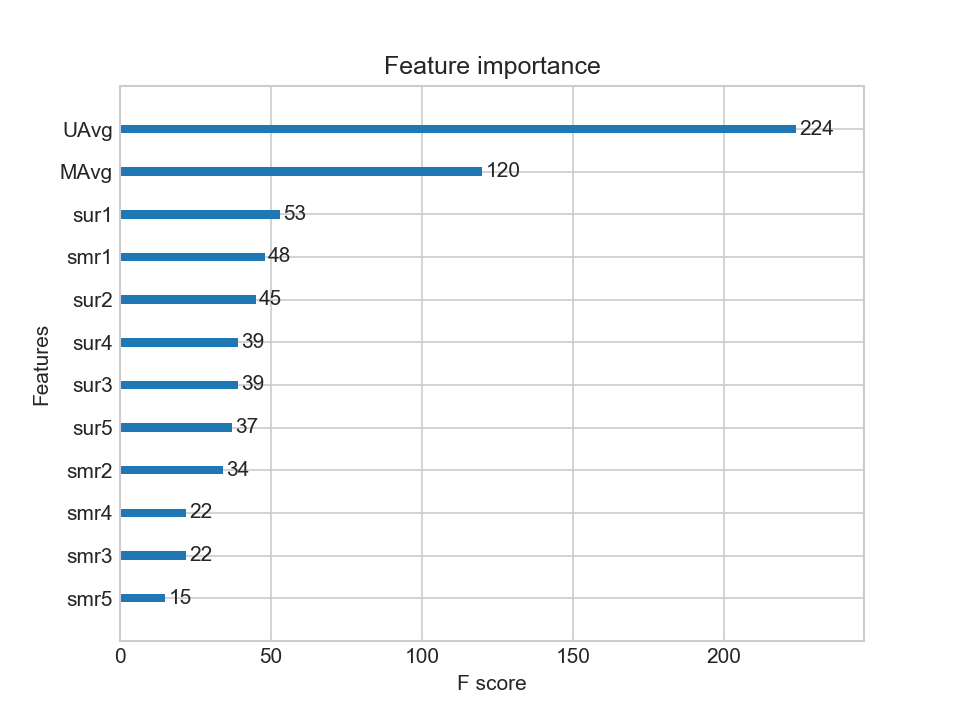

In [85]:
xgb.plot_importance(first_xgb)
plt.show()

## For Test Data

In [73]:
x_test = reg_test_df.drop(['user','movie','rating'], axis=1)
y_test = reg_test_df['rating']

y_test_pred = first_xgb.predict(x_test)
rmse_test, mape_test = get_error_metrics(y_true=y_test.values, y_pred=y_test_pred)
rmse_test, mape_test

In [78]:
print_error_dists(np.abs(y_test.values-y_test_pred))

No. of predicted ratings with error between 0 and 1(inclusive) : 4905
No. of predicted ratings with error between 1 and 2(inclusive) : 2612
No. of predicted ratings with error between 2 and 3(inclusive) : 602
No. of predicted ratings with error between 3 and 4(inclusive) : 89
No. of predicted ratings with error > 4 : 0


#### Storing these error metrics to our global dictionary.. 

In [254]:
models_evaluation_test['first_xgb'] = {'rmse': rmse_test, 'mape':mape_test}
models_evaluation_test['first_xgb']['predictions'] = y_test_pred

models_evaluation_test['first_xgb']

{'mape': 35.05026182158571,
 'predictions': array([3.854013 , 2.3819778, 3.0049725, ..., 3.4059603, 3.237263 ,
        3.0150583], dtype=float32),
 'rmse': 1.1896540970709255}

<IPython.core.display.Javascript object>


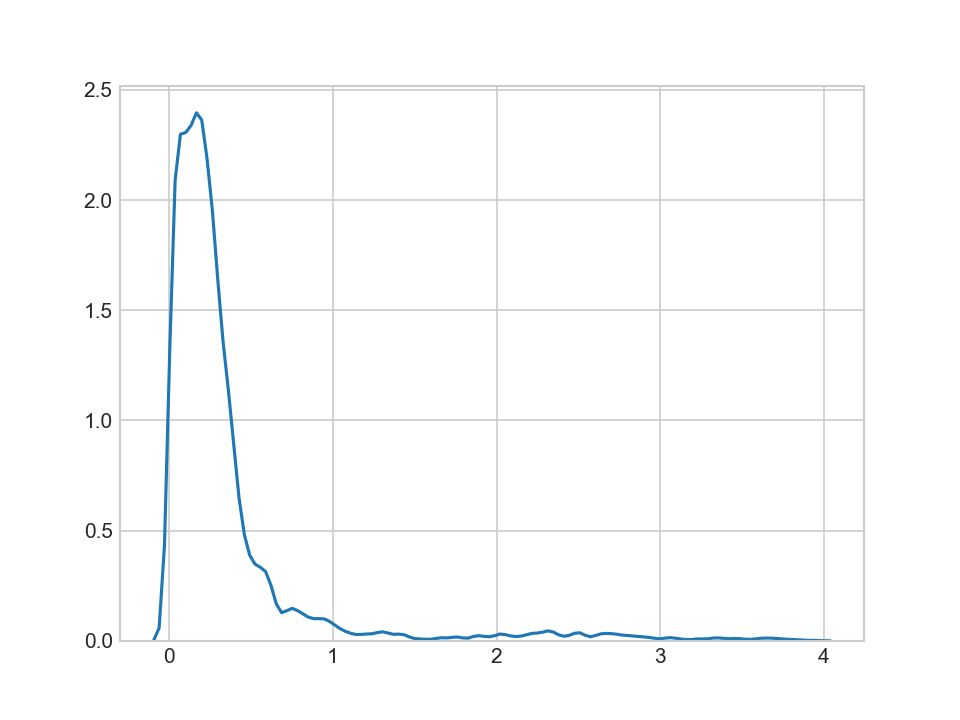

In [82]:
sns.distplot(np.abs( (y_test.values-y_test_pred)/y_test.values), hist=False)
plt.show()

-----------------------------------------------------------------------------------------------------
---
 

-----------------------------------------------------------------------------------------------------
---
 

In [88]:
import random
import numpy as np

my_seed = 15
random.seed(my_seed)
np.random.seed(my_seed)

## 1.2. Surprise -  CustomBaseLineModel 
    - with normal baseline model, we can't  count the number of cold start problems

In [89]:
from surprise import Reader, Dataset, BaselineOnly

- #### Predicted_rating : ( baseline prediction )

>$   \large {\hat{r}_{ui} = b_{ui} =\mu + b_u + b_i} $

- ####  Optimization function ( Least Squares Problem )

> $ \large \sum_{r_{ui} \in R_{train}} \left(r_{ui} - (\mu + b_u + b_i)\right)^2 +
\lambda \left(b_u^2 + b_i^2 \right).\text {        [mimimize } {b_u, b_i]}$

- #### Preparing TrainData for this baseline model from surprise

In [90]:
reg_train.head()

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating
0,1590,0,3.624457,1.0,2.0,2.0,2.0,2.0,3.0,4.0,4.0,2.0,3.0,3.895522,2.00,3.0
1,1907,0,3.624457,3.0,2.0,2.0,2.0,2.0,1.0,4.0,4.0,5.0,4.0,3.238636,2.00,1.0
2,231,1,3.624457,3.0,3.0,4.0,4.0,4.0,2.0,5.0,5.0,5.0,4.0,3.761905,3.35,3.0
3,847,1,3.624457,3.0,4.0,3.0,3.0,2.0,4.0,4.0,4.0,4.0,4.0,4.090909,3.35,5.0
4,993,1,3.624457,3.0,4.0,4.0,3.0,3.0,3.0,2.0,3.0,5.0,3.0,3.172414,3.35,3.0


In [91]:
reg_train.shape

(126228, 16)

In [93]:
reg_train[['user','movie','rating']].head()

,user,movie,rating
0,1590,0,3.0
1,1907,0,1.0
2,231,1,3.0
3,847,1,5.0
4,993,1,3.0


In [94]:
reader = Reader(rating_scale=(1,5))

In [95]:
train_data = Dataset.load_from_df(reg_train[['user', 'movie', 'rating']], reader)

In [96]:
# build the trainset from traindata
trainset = train_data.build_full_trainset()

### Baseline Model

In [97]:
class BaseLineAlgo(BaselineOnly):

    def __init__(self, sim_options={}, bsl_options={}):

        BaselineOnly.__init__(self, bsl_options=bsl_options)

    def fit(self, trainset):
        self.trainset = trainset
        BaselineOnly.fit(self, trainset)
        return self

    def estimate(self, u, i):
        details = {'cold_start':False}
        if not (self.trainset.knows_user(u) and self.trainset.knows_item(i)):
            details = {'cold_start':True}
        
        return BaselineOnly.estimate(self, u, i), details

In [98]:
bsl_options = {'method': 'sgd',
               'learning_rate': .001
               }
my_bsl_algo = BaseLineAlgo(bsl_options=bsl_options)

In [99]:
my_bsl_algo.fit(trainset)

Estimating biases using sgd...


In [167]:
def get_ratings(predictions):
    actual = np.array([pred.r_ui for pred in predictions])
    pred = np.array([pred.est for pred in predictions])
    
    return actual, pred

In [169]:
def get_errors(predictions, include_cold_start = True, print_them=False):
    
    if include_cold_start:
        actual, pred = get_ratings(predictions)
        rmse = np.sqrt(np.mean(pred - actual)**2)
        mape = np.mean(np.abs(pred - actual)/actual)
    else:
        rmse = np.sqrt(np.mean([(pred.r_ui - pred.est)**2  for pred in predictions if not pred.details['cold_start']]))
        mape = np.mean([ np.abs(pred.est - pred.r_ui)/pred.r_ui   for pred in predictions if not pred.details['cold_start']])
    
    if print_them:
        print("\nRMSE : {}\n\nMAPE : {}".format(rmse, mape*100))
    return rmse, mape*100


### evaluating Training data

In [101]:
bsl_train_preds = my_bsl_algo.test(trainset.build_testset())

In [102]:
bsl_train_preds[0]

Prediction(uid=1590, iid=0, r_ui=3.0, est=3.809650263762233, details={'cold_start': False, 'was_impossible': False})

In [103]:
bsl_train_preds[0].details['cold_start']

False

In [104]:
my_bsl_train_rmse, my_bsl_train_mape = get_errors(bsl_train_preds, print_them=True)


RMSE : 0.9312622541249634

MAPE : 28.756547341945467


In [215]:
_, my_bsl_train_preds = get_ratings(bsl_train_preds)
my_bsl_train_preds

array([3.80965026, 3.19968029, 3.792209  , ..., 3.69131461, 3.93049387,
       3.91066456])

In [234]:
# Just store these error metrics in our models_evaluation datastructure
#########################################################################
models_evaluation_train['bsl_algo'] = {'rmse':my_bsl_train_rmse, 'mape':my_bsl_train_mape}
models_evaluation_train['bsl_algo']['predictions'] = my_bsl_train_preds

models_evaluation_train['bsl_algo']

{'mape': 28.756547341945467,
 'predictions': array([3.80965026, 3.19968029, 3.792209  , ..., 3.69131461, 3.93049387,
        3.91066456]),
 'rmse': 0.9312622541249634}

### Evaluating Test data

In [112]:
reg_test_df.head()

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating
0,118,0,3.624457,5.0,4.0,4.0,5.0,4.0,4.20339,4.20339,4.20339,4.20339,4.20339,4.203390,2.0,3.0
1,192,0,3.624457,3.0,3.0,2.0,4.0,4.0,5.00000,4.00000,3.00000,3.00000,3.00000,3.000000,2.0,5.0
2,214,0,3.624457,3.0,4.0,4.0,2.0,4.0,5.00000,4.00000,5.00000,3.00000,5.00000,3.500000,2.0,3.0
3,283,0,3.624457,3.0,3.0,5.0,4.0,4.0,5.00000,5.00000,5.00000,5.00000,2.00000,4.133333,2.0,5.0
4,297,0,3.624457,3.0,3.0,3.0,3.0,5.0,5.00000,3.00000,4.00000,5.00000,5.00000,4.333333,2.0,3.0


In [118]:
testset = list(zip(reg_test_df.user.values, reg_test_df.movie.values, reg_test_df.rating.values))

In [119]:
test_preds = my_bsl_algo.test(testset)

In [120]:
test_preds[0]

Prediction(uid=118, iid=0, r_ui=3.0, est=3.948776296894135, details={'cold_start': False, 'was_impossible': False})

In [121]:
my_bsl_test_rmse, my_bsl_test_mape = get_errors(test_preds, print_them=True)


RMSE : 1.1674790109548865

MAPE : 35.805018461619866


In [236]:
#### Store these error metrics in our model_evaluations dict 
##############################################################################
models_evaluation_test['bsl_algo'] = {'rmse':my_bsl_test_rmse, 'mape':my_bsl_test_mape}

_, my_bsl_test_preds = get_ratings(test_preds)
models_evaluation_test['bsl_algo']['predictions'] = my_bsl_test_preds

models_evaluation_test['bsl_algo']

{'mape': 35.805018461619866,
 'predictions': array([3.9487763 , 3.54248358, 3.56137288, ..., 3.5184957 , 3.5188059 ,
        3.51197286]),
 'rmse': 1.1674790109548865}

## 1.3  XGBoost with Baseline Predictor

In [130]:
# previously....
reg_train.head(2)

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating
0,1590,0,3.624457,1.0,2.0,2.0,2.0,2.0,3.0,4.0,4.0,2.0,3.0,3.895522,2.0,3.0
1,1907,0,3.624457,3.0,2.0,2.0,2.0,2.0,1.0,4.0,4.0,5.0,4.0,3.238636,2.0,1.0


In [179]:
# add our baseline_predicted value as our feature..
reg_train['bslpr'] = models_evaluation_train['bsl_algo']['predictions']
reg_train.head(2)

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating,bslpr
0,1590,0,3.624457,1.0,2.0,2.0,2.0,2.0,3.0,4.0,4.0,2.0,3.0,3.895522,2.0,3.0,3.80965
1,1907,0,3.624457,3.0,2.0,2.0,2.0,2.0,1.0,4.0,4.0,5.0,4.0,3.238636,2.0,1.0,3.19968


### 1.3.1 train XGBoost with this additional baseline feature

In [192]:
x_train = reg_train.drop(['user', 'movie','rating'], axis=1)
y_train = reg_train['rating']

xgb_bsl = xgb.XGBRegressor(n_jobs=10, random_state=15)
xgb_bsl.fit(x_train, y_train,eval_metric='rmse')

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=10, nthread=None, objective='reg:linear', random_state=15,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

### 1.3.2 Evaluating with train data...

In [199]:
start = datetime.now()
xgb_bsl_train_preds = xgb_bsl.predict(x_train)
print(datetime.now()-start)

0:00:00.092995


In [241]:
rmse, mape = get_error_metrics(y_true = y_train, y_pred = xgb_bsl_train_preds)
rmse, mape

(0.8473682995786805, 25.044914451887806)

In [202]:
print_error_dists(abs_errors=np.abs(y_train.values - xgb_bsl_train_preds))

No. of predicted ratings with error between 0 and 1(inclusive) : 98336
No. of predicted ratings with error between 1 and 2(inclusive) : 24744
No. of predicted ratings with error between 2 and 3(inclusive) : 2932
No. of predicted ratings with error between 3 and 4(inclusive) : 216
No. of predicted ratings with error > 4 : 0


In [243]:
#- Storing the metrics 
############################################
models_evaluation_train['xgb_bsl'] = {'rmse':rmse, 'mape':mape}
models_evaluation_train['xgb_bsl']['predictions'] = xgb_bsl_train_preds

models_evaluation_train['xgb_bsl']

{'mape': 25.044914451887806,
 'predictions': array([2.372274 , 1.7693403, 3.4035742, ..., 3.0373535, 3.0171025,
        3.8241556], dtype=float32),
 'rmse': 0.8473682995786805}

<IPython.core.display.Javascript object>


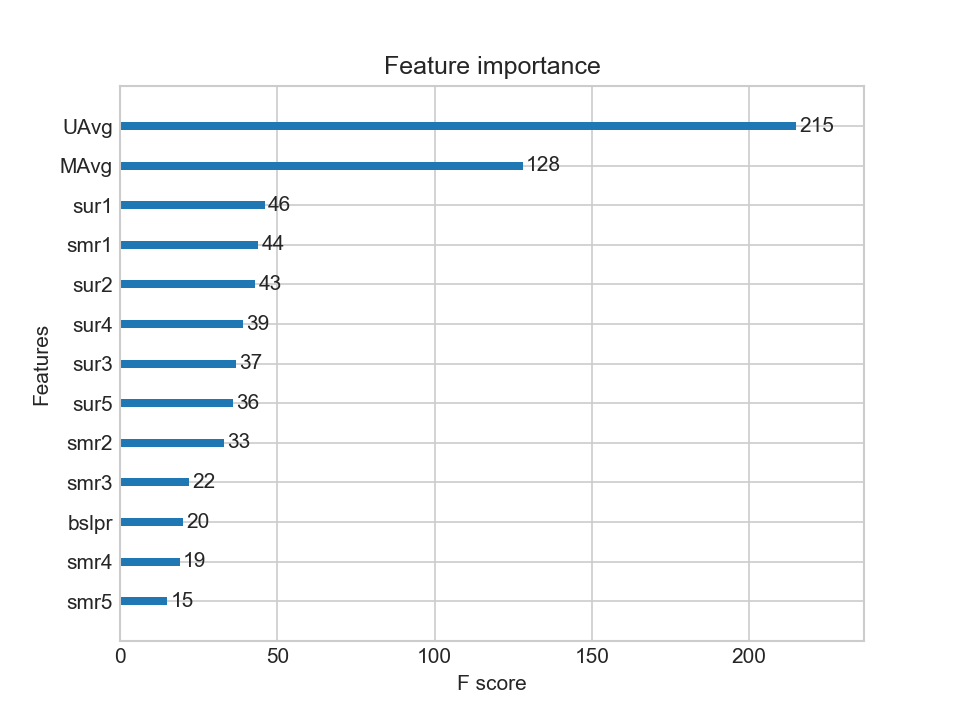

In [194]:
xgb.plot_importance(xgb_bsl)
plt.show()

 - Observations :
 

### 1.3.3 Evaluating new XGB with Traindata

In [195]:
reg_test_df.head(2)

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating
0,118,0,3.624457,5.0,4.0,4.0,5.0,4.0,4.20339,4.20339,4.20339,4.20339,4.20339,4.20339,2.0,3.0
1,192,0,3.624457,3.0,3.0,2.0,4.0,4.0,5.00000,4.00000,3.00000,3.00000,3.00000,3.00000,2.0,5.0


In [248]:
# add that baseline predicted ratings with Surprise to the test data as well
reg_test_df['bslpr']  = models_evaluation_test['bsl_algo']['predictions']

reg_test_df.head(2)

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating,bslpr
0,118,0,3.624457,5.0,4.0,4.0,5.0,4.0,4.20339,4.20339,4.20339,4.20339,4.20339,4.20339,2.0,3.0,3.948776
1,192,0,3.624457,3.0,3.0,2.0,4.0,4.0,5.00000,4.00000,3.00000,3.00000,3.00000,3.00000,2.0,5.0,3.542484


In [250]:
x_test = reg_test_df.drop(['user','movie','rating'], axis=1)
y_test = reg_test_df['rating']

xgb_bsl_test_preds = xgb_bsl.predict(x_test)
rmse_test, mape_test = get_error_metrics(y_true=y_test.values, y_pred=xgb_bsl_test_preds)
rmse_test, mape_test

(1.1896540970709255, 35.05026182158571)

In [255]:
# __ Storing these metrics to the dictionary__
#########################################################
models_evaluation_test['xgb_bsl'] = {'rmse': rmse_test, 'mape': mape_test}
models_evaluation_test['xgb_bsl']['predictions'] = xgb_bsl_test_preds

models_evaluation_test['xgb_bsl']

{'mape': 35.05026182158571,
 'predictions': array([3.8989341, 2.40227  , 3.0303586, ..., 3.402841 , 3.2198586,
        3.0186212], dtype=float32),
 'rmse': 1.1896540970709255}

In [252]:
print_error_dists(np.abs(y_test.values-xgb_bsl_test_preds))

No. of predicted ratings with error between 0 and 1(inclusive) : 4906
No. of predicted ratings with error between 1 and 2(inclusive) : 2616
No. of predicted ratings with error between 2 and 3(inclusive) : 596
No. of predicted ratings with error between 3 and 4(inclusive) : 90
No. of predicted ratings with error > 4 : 0


<IPython.core.display.Javascript object>


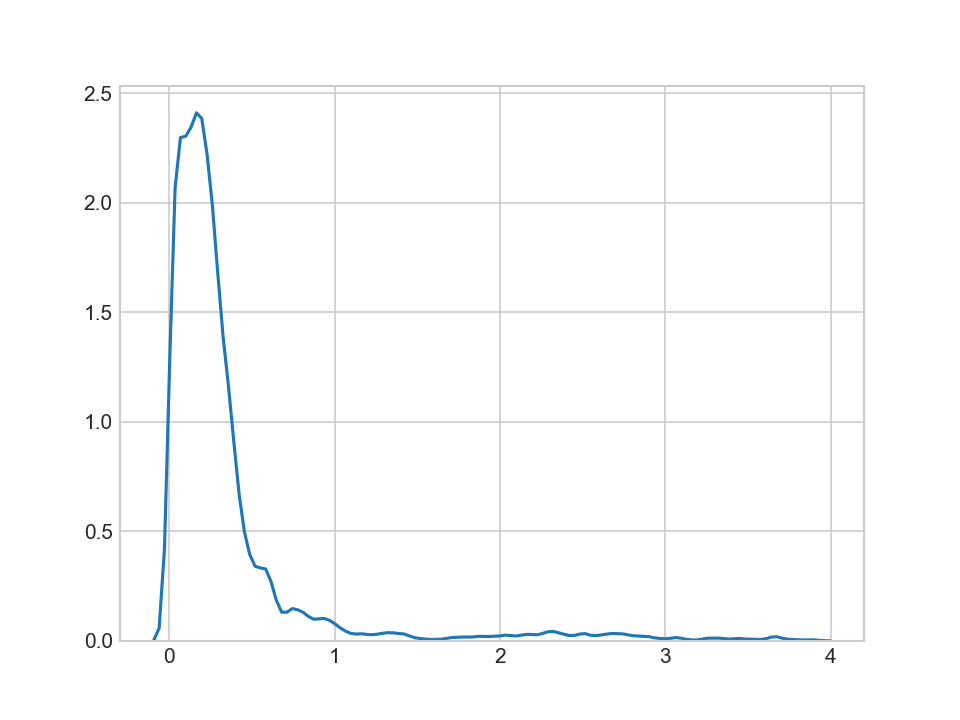

In [257]:
sns.distplot(np.abs(y_test.values - models_evaluation_test['xgb_bsl']['predictions']) / y_test.values, hist=False) 
plt.show()

In [264]:
print('\nTEST METRICS :')
print('-'*30)

print('First_xgb :({}, {})'.format(models_evaluation_test['first_xgb']['rmse'], models_evaluation_test['first_xgb']['mape']))
print('\nxgb_bsl :({}, {})'.format(models_evaluation_test['xgb_bsl']['rmse'], models_evaluation_test['xgb_bsl']['mape']))


TEST METRICS :
------------------------------
First_xgb :(1.1896540970709255, 35.05026182158571)

xgb_bsl :(1.1896540970709255, 35.05026182158571)


> Seems, there is no improvement at all with adding just the baseline_predictions to the model.. 

# 2. Surprise -   KNN with BaseLineModel